# 5. Flux simulation, visualization, and further analyses

In [2]:
import numpy as np

from pipeGEM import load_remote_model
from pipeGEM.data import get_syn_gene_data
from pipeGEM.utils import random_perturb
from pipeGEM import Group
import matplotlib.pyplot as plt

In [3]:
ecoli = load_remote_model("e_coli_core")

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-28


In [4]:
group = Group({"ecoli_g1": {"e11": ecoli, 
                            "e12": random_perturb(ecoli.copy(), structure_ratio=0.99, constr_ratio=0.8),
                            "e13": random_perturb(ecoli.copy(), structure_ratio=1, constr_ratio=0.99),
                            "e14": random_perturb(ecoli.copy(), structure_ratio=1, constr_ratio=0.8, random_state=1)},
                "ecoli_g2": {"e21": random_perturb(ecoli.copy(), structure_ratio=0.99, constr_ratio=0.9), 
                             "e22": ecoli,
                             "e23": random_perturb(ecoli.copy(), structure_ratio=0.99, constr_ratio=0.8),
                             "e24": random_perturb(ecoli.copy(), structure_ratio=1, constr_ratio=0.8),
                             "e25": random_perturb(ecoli.copy(), structure_ratio=1, constr_ratio=0.6, random_state=2)}}, name_tag="G2",
                treatments={"e11": "A", "e12": "B", "e13": "A", "e14": "B", "e21": "A", "e22": "A", "e23": "B", "e24": "B", "e25": "B"})

Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpi1_xftau.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpw2nllpic.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpxxpa36t_.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpia4m407g.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpf8po26cw.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpl8fjl12_.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpd8ilcktm.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 n

## pFBA / FBA

#### do_flux_analysis

In [5]:
pFBA_result = group.do_flux_analysis(method="pFBA")

In [6]:
pFBA_result

FBA_Analysis at 0x1bd6fd05ba0

-----------
Parameters:
{'categorical': {'model', 'group_name', 'treatments'}, 'name': 'G2', 'group_by': 'model', 'group': {'model': ['e11', 'e12', 'e13', 'e14', 'e21', 'e22', 'e23', 'e24', 'e25']}}
-----------
Result keys:
group_annotation, rxn_annotation, flux_df

In [7]:
pFBA_result.group_annotation

,n_rxns,n_genes,n_mets,group_name,treatments
e11,95,137,72,ecoli_g1,A
e12,94,135,72,ecoli_g1,B
e13,95,137,72,ecoli_g1,A
e14,95,137,72,ecoli_g1,B
e21,94,135,72,ecoli_g2,A
e22,95,137,72,ecoli_g2,A
e23,94,135,72,ecoli_g2,B
e24,95,137,72,ecoli_g2,B
e25,95,137,72,ecoli_g2,B


#### plot a bar plot for the analysis

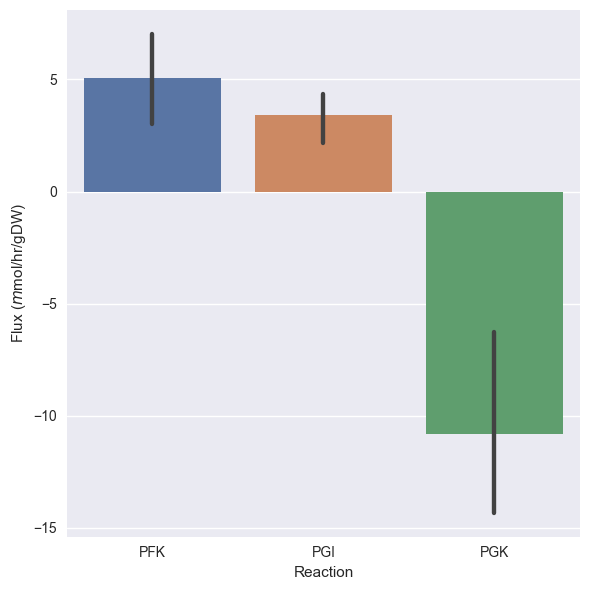

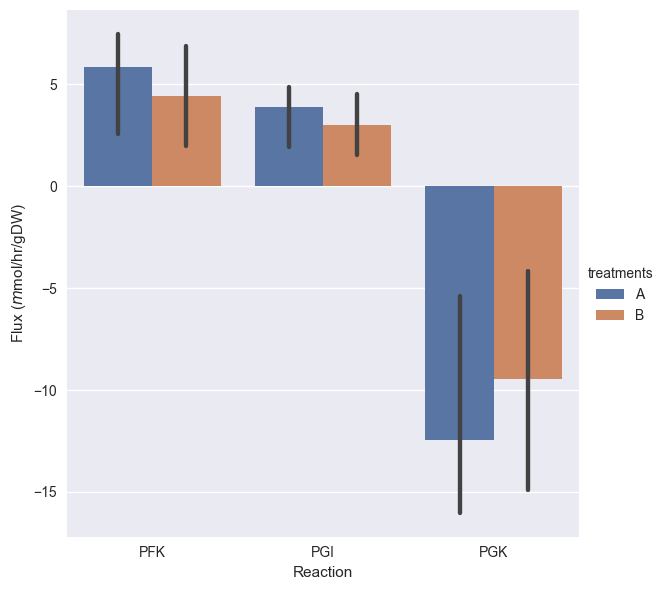

In [8]:
pFBA_result.plot(rxn_ids=["PFK", "PGI", "PGK"], aspect=1)
pFBA_result.plot(rxn_ids=["PFK", "PGI", "PGK"], group_by="treatments", aspect=1)

#### correlation, dimensionality reduction

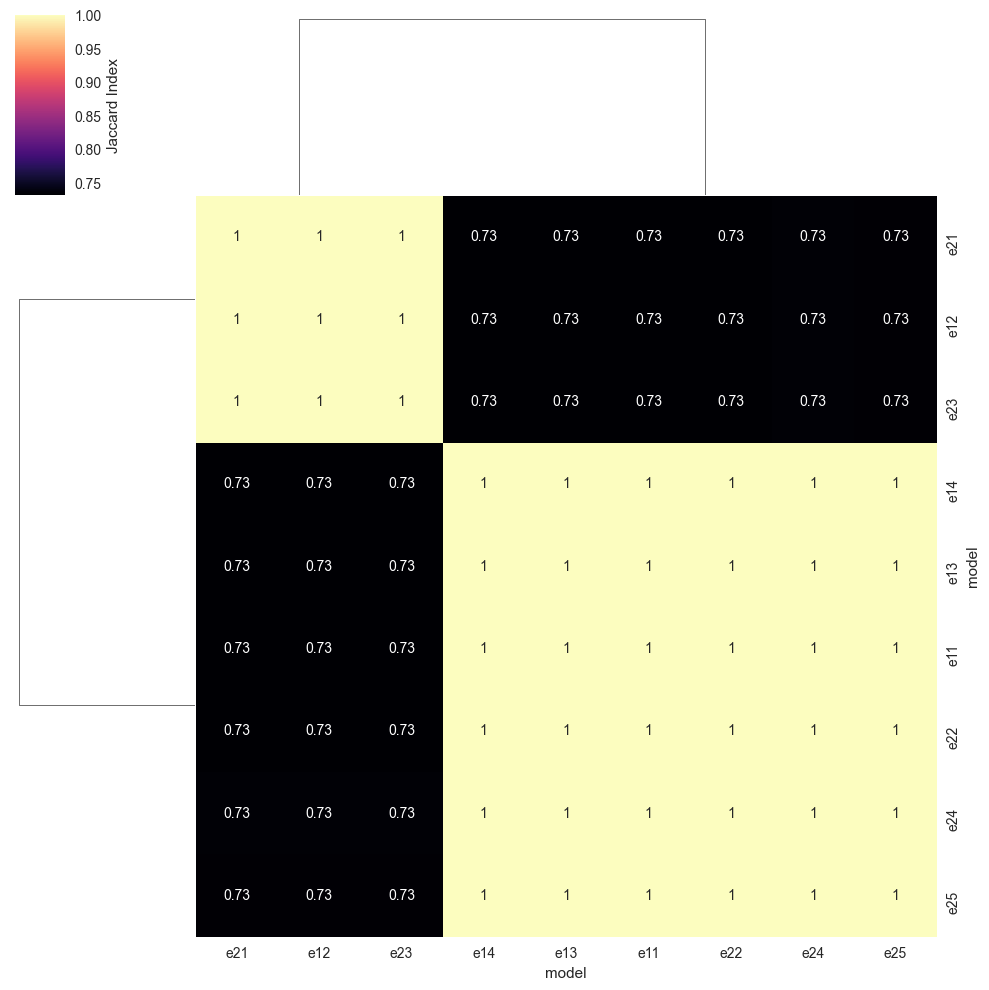

In [9]:
corr_result = pFBA_result.corr(rxn_corr=False, group_by="model")
corr_result.plot(annot=True)

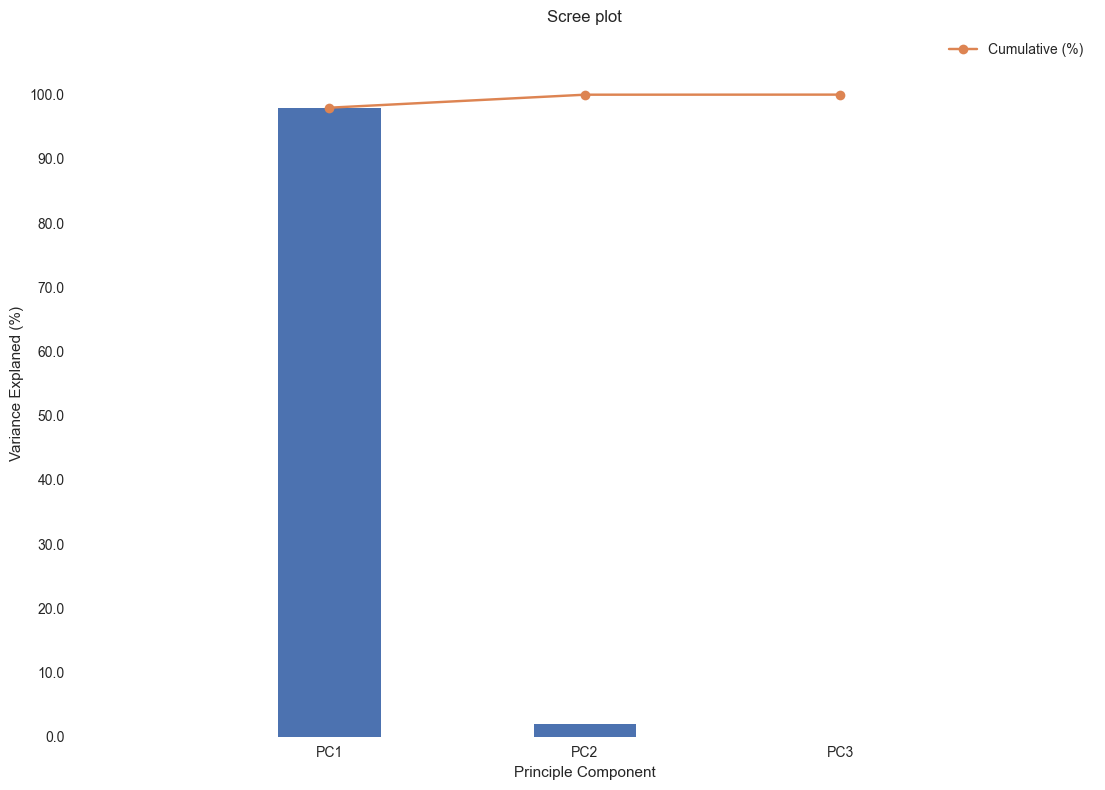

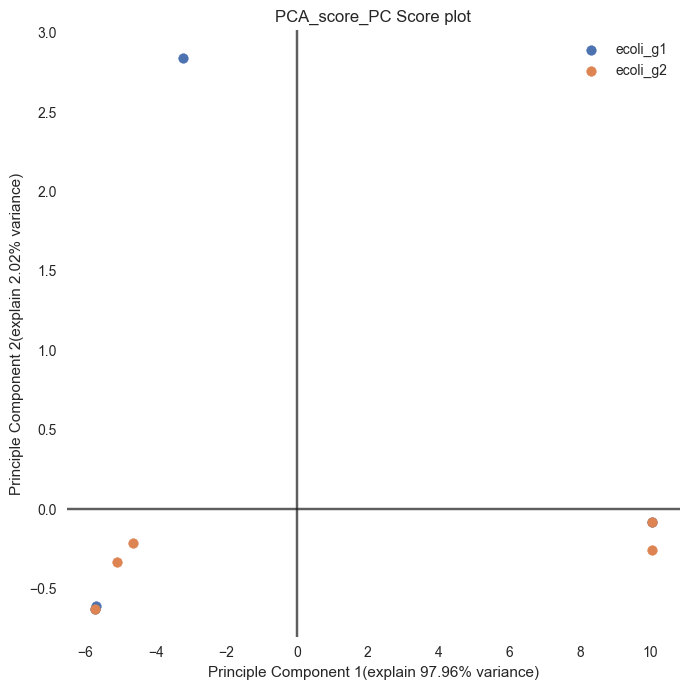

In [10]:
pca_result = pFBA_result.dim_reduction(method="PCA", 
                                       n_components=3, 
                                       standardize=True,)

pca_result.plot()

#### statistical tests

In [11]:
diff_test = pFBA_result.diff_test(between="treatments")

100%|████████████████████████████████████████████████████████████████████████████████| 852/852 [00:14<00:00, 60.31it/s]


[PairwiseTestResult at 0x1bd791667d0

-----------
Parameters:
{'dep_var': 'PFK', 'between': 'treatments', 'parametric': 'auto', 'method': 'mw'}
-----------
Result keys:
result_df, p_value_col, assump_test_results
, PairwiseTestResult at 0x1bd79164550

-----------
Parameters:
{'dep_var': 'PFL', 'between': 'treatments', 'parametric': 'auto', 'method': 'mw'}
-----------
Result keys:
result_df, p_value_col, assump_test_results
, PairwiseTestResult at 0x1bd79167ee0

-----------
Parameters:
{'dep_var': 'PGI', 'between': 'treatments', 'parametric': 'auto', 'method': 'mw'}
-----------
Result keys:
result_df, p_value_col, assump_test_results
, PairwiseTestResult at 0x1bd79166c50

-----------
Parameters:
{'dep_var': 'PGK', 'between': 'treatments', 'parametric': 'auto', 'method': 'mw'}
-----------
Result keys:
result_df, p_value_col, assump_test_results
, PairwiseTestResult at 0x1bd76818dc0

-----------
Parameters:
{'dep_var': 'PGL', 'between': 'treatments', 'parametric': 'auto', 'method': 'mw'}


In [14]:
diff_test.result_df.sort_values("adjusted_p_value")

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges,label,adjusted_p_value
0,treatments,A,B,False,False,17.0,two-sided,0.108361,0.377800,PFK,0.335162
488,treatments,A,B,False,False,20.0,two-sided,0.017451,0.762342,ATPM,0.335162
487,treatments,A,B,False,False,16.0,two-sided,0.168761,0.358093,ACONTb,0.335162
486,treatments,A,B,False,False,16.0,two-sided,0.168761,0.358093,ACONTa,0.335162
485,treatments,A,B,False,False,16.0,two-sided,0.168761,0.363825,PPC,0.335162
...,...,...,...,...,...,...,...,...,...,...,...
179,treatments,A,B,False,False,10.0,two-sided,1.000000,NaN,MALS,1.000000
492,treatments,A,B,False,False,10.0,two-sided,1.000000,NaN,ADK1,1.000000
491,treatments,A,B,False,False,10.0,two-sided,1.000000,NaN,PPS,1.000000
445,treatments,A,B,False,False,10.0,two-sided,1.000000,NaN,FRD7,1.000000


## FVA

In [5]:
fva_result = group.do_flux_analysis(method="FVA")

In [12]:
fva_result.flux_df

,Reaction,minimum,maximum,model,group_name,treatments
0,PFK,0.327415,10.000000,e11,ecoli_g1,A
1,PFL,0.000000,40.000000,e11,ecoli_g1,A
2,PGI,-50.000000,10.000000,e11,ecoli_g1,A
3,PGK,-20.000000,0.000000,e11,ecoli_g1,A
4,PGL,0.000000,60.000000,e11,ecoli_g1,A
...,...,...,...,...,...,...
90,NADH16,0.000000,115.091239,e25,ecoli_g2,B
91,NADTRHD,0.000000,42.215836,e25,ecoli_g2,B
92,NH4t,0.000000,9.590937,e25,ecoli_g2,B
93,O2t,0.000000,57.545620,e25,ecoli_g2,B


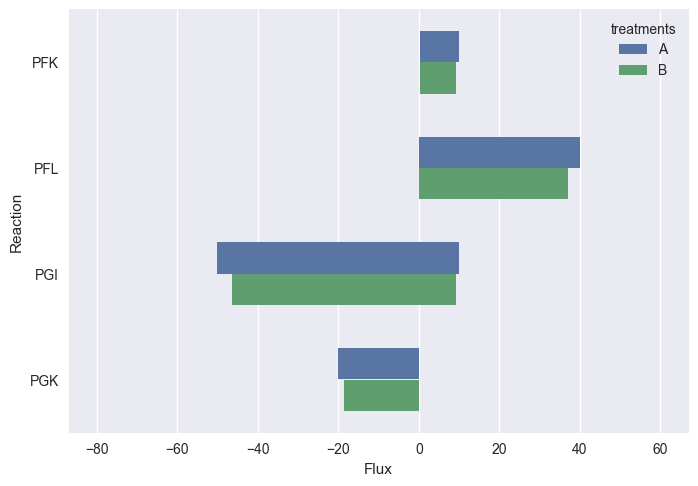

In [18]:
fva_result.plot(rxn_ids=["PFK", "PFL", "PGI", "PGK"], color_by="treatments", vertical=False)

## Randomized sampling

In [19]:
sampling_result = group.do_flux_analysis(method="sampling", n=100)

Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpetd15_p8.lp
Reading time = 0.00 seconds
: 73 rows, 190 columns, 722 nonzeros
Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpehi_u0m8.lp
Reading time = 0.00 seconds
: 73 rows, 188 columns, 714 nonzeros
Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpgf4z6m1y.lp
Reading time = 0.00 seconds
: 73 rows, 190 columns, 722 nonzeros
Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpv56kse29.lp
Reading time = 0.00 seconds
: 73 rows, 190 columns, 722 nonzeros
Read LP format model from file C:\Users\user\AppData\Local\Temp\tmp4wiape7o.lp
Reading time = 0.00 seconds
: 73 rows, 188 columns, 714 nonzeros
Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpxqvhflqo.lp
Reading time = 0.00 seconds
: 73 rows, 190 columns, 722 nonzeros
Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpsqxea6br.lp
Reading time = 0.00 seconds
: 73 rows, 188 columns, 714 n

In [21]:
sampling_result

SamplingAnalysis at 0x2184d0595d0

-----------
Parameters:
{'categorical': {'group_name', 'treatments', 'model'}, 'name': 'G2', 'group_by': 'model', 'group': {'model': ['e11', 'e12', 'e13', 'e14', 'e21', 'e22', 'e23', 'e24', 'e25']}}
-----------
Result keys:
flux_df

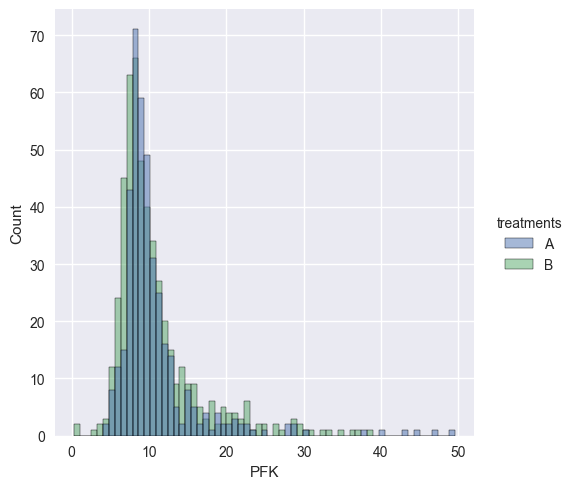

In [25]:
sampling_result.plot(rxn_id="PFK", kind="hist", group_by="treatments")

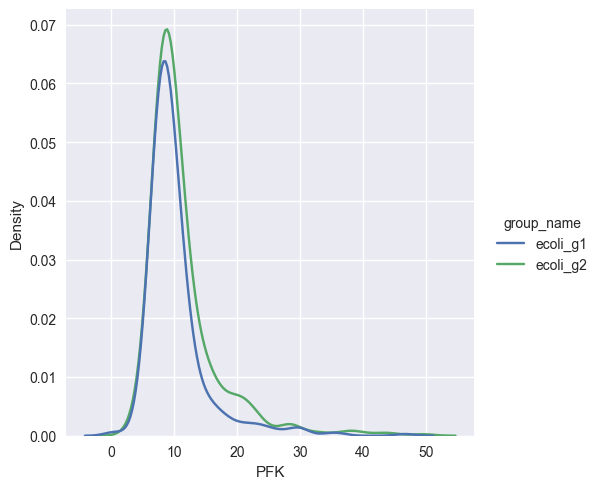

In [31]:
sampling_result.plot(rxn_id="PFK", kind="kde", group_by="group_name")

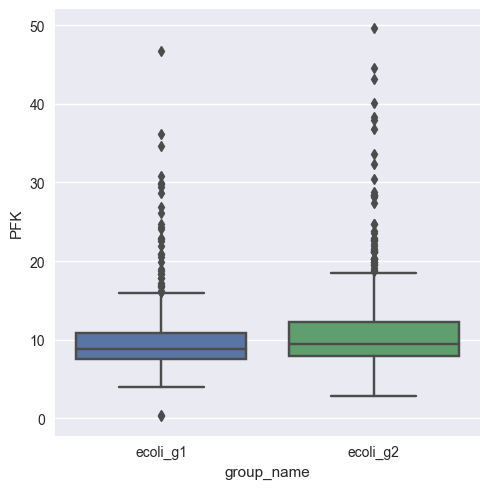

In [29]:
sampling_result.plot(rxn_id="PFK", plotting_type="catplot", kind="box", group_by="group_name")

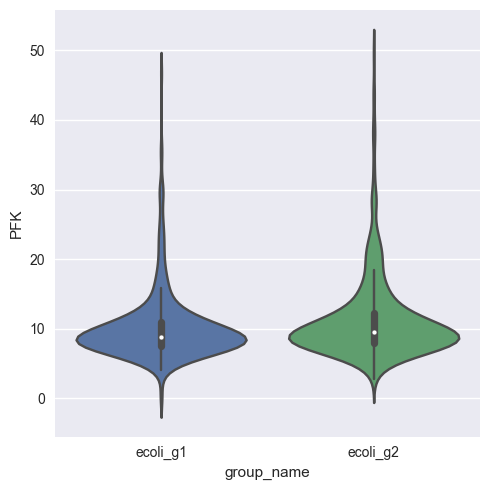

In [30]:
sampling_result.plot(rxn_id="PFK", plotting_type="catplot", kind="violin", group_by="group_name")

In [32]:
diff_result = sampling_result.diff_test(between="treatments")

100%|█████████████████████████████████████████████████████████████████████████| 95/95 [00:01<00:00, 53.18it/s]


In [33]:
diff_result

PairwiseTestResult at 0x2184e3e7dc0

-----------
Parameters:
{'p_value_col': 'p-unc', 'label_str_format': '{reaction}', 'between': 'treatments', 'parametric': 'auto'}
-----------
Result keys:
result_df

In [36]:
diff_result.result_df.sort_values("adjusted_p_value")

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges,label,adjusted_p_value
73,treatments,A,B,False,False,185376.0,two-sided,1.433445e-107,1.751832,GLCpts,6.808865e-106
51,treatments,A,B,False,False,14624.0,two-sided,1.433445e-107,-1.751832,EX_glc__D_e,6.808865e-106
24,treatments,A,B,False,False,159785.0,two-sided,1.075593e-55,0.466487,BIOMASS_Ecoli_core_w_GAM,2.043626e-54
8,treatments,A,B,False,False,159785.0,two-sided,1.075593e-55,0.466487,PIt2r,2.043626e-54
60,treatments,A,B,False,False,40215.0,two-sided,1.075593e-55,-0.466487,EX_pi_e,2.043626e-54
...,...,...,...,...,...,...,...,...,...,...,...
70,treatments,A,B,False,False,100000.0,two-sided,1.000000e+00,NaN,FUMt2_2,1.000000e+00
52,treatments,A,B,False,False,100000.0,two-sided,1.000000e+00,NaN,EX_gln__L_e,1.000000e+00
68,treatments,A,B,False,False,100000.0,two-sided,1.000000e+00,NaN,FRUpts2,1.000000e+00
75,treatments,A,B,False,False,100000.0,two-sided,1.000000e+00,NaN,GLNabc,1.000000e+00


In [39]:
diff_result.result_df.query("label == 'GLCpts'")

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges,label,adjusted_p_value
73,treatments,A,B,False,False,185376.0,two-sided,1.433445e-107,1.751832,GLCpts,6.808865e-106


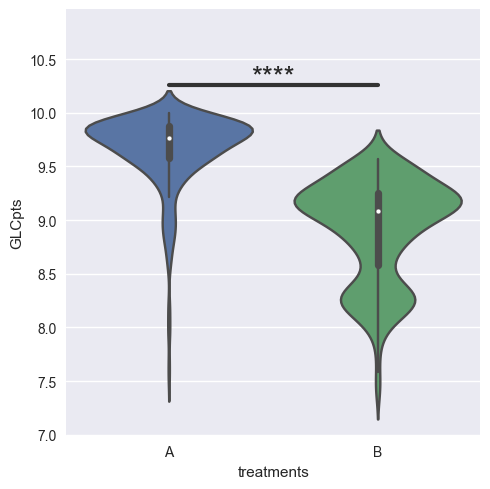

In [44]:
sampling_result.plot(rxn_id="GLCpts", plotting_type="catplot", kind="violin", group_by="treatments", plot_significance=True)